In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/yooseok.csv', parse_dates=["date"],encoding='utf-8')
data_2 = pd.read_csv('/content/drive/MyDrive/yooseok.csv', parse_dates=["date"],encoding='utf-8')

In [ ]:
pd.to_datetime(data['date'])

0      2002-10-29
1      2002-10-30
2      2002-10-31
3      2002-11-01
4      2002-11-04
          ...    
4739   2021-12-22
4740   2021-12-23
4741   2021-12-24
4742   2021-12-27
4743   2021-12-28
Name: date, Length: 4744, dtype: datetime64[ns]

In [ ]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day


In [ ]:
data.set_index("date", inplace=True)
data

# data_2 = data.drop(['data'])

,stock,china,japan,euro,america,gold,silver,cooper,score,year,month,day
date,,,,,,,,,,,,
2002-10-29,46675,146.730,9.94585,1202.415,1225.550,51365.35068,729.506322,113.640874,1.098824,2002,10,29
2002-10-30,45275,148.810,9.94970,1203.565,1231.050,51457.45309,729.523386,114.476549,0.321667,2002,10,30
2002-10-31,46425,147.820,9.97885,1207.955,1226.350,51585.43144,729.982520,115.661675,0.186667,2002,10,31
2002-11-01,45475,147.955,10.01395,1216.490,1223.950,51613.99806,725.315907,116.406727,0.186667,2002,11,1
2002-11-04,47300,147.540,9.98015,1215.595,1218.900,51320.42301,722.323265,117.296914,0.190000,2002,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,180000,187.005,10.43115,1346.185,1191.240,283373.34640,3558.810593,685.998757,-0.072857,2021,12,22
2021-12-23,182000,186.470,10.39520,1345.375,1187.825,284061.50130,3585.924893,686.349717,0.836000,2021,12,23
2021-12-24,192750,186.265,10.37180,1343.775,1186.545,284100.69340,3595.794092,691.378131,0.277143,2021,12,24


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scale_cols = ['stock','china','japan','euro','america','gold','silver','cooper','score']
df_scaled = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

         stock     china     japan      euro   america      gold    silver  \
0     0.123808  0.271079  0.288991  0.066741  0.482316  0.002415  0.004071   
1     0.116690  0.289347  0.289438  0.068131  0.490524  0.002741  0.004073   
2     0.122537  0.280652  0.292820  0.073438  0.483510  0.003194  0.004148   
3     0.117707  0.281837  0.296893  0.083756  0.479928  0.003295  0.003392   
4     0.126986  0.278193  0.292971  0.082674  0.472392  0.002256  0.002907   
...        ...       ...       ...       ...       ...       ...       ...   
4739  0.801703  0.624802  0.345307  0.240539  0.431115  0.823679  0.462430   
4740  0.811872  0.620104  0.341135  0.239560  0.426019  0.826115  0.466823   
4741  0.866531  0.618303  0.338420  0.237626  0.424108  0.826254  0.468421   
4742  0.881785  0.618347  0.336378  0.237396  0.424526  0.827214  0.462709   
4743  0.875429  0.619489  0.334637  0.237843  0.425310  0.830105  0.475559   

        cooper     score  
0     0.005370  0.614807  
1     0.0

## only stock

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.metrics import RootMeanSquaredError()
from keras.layers import LSTM


feature_cols = ['china','japan','euro','america','gold','silver','cooper','score']
label_cols = ['stock']

lst = []

for i in range(1, 31):
  
  TEST_SIZE = 200
  train = df_scaled[:-TEST_SIZE]
  test = df_scaled[-TEST_SIZE:]

  train_feature = train[feature_cols]
  train_label = train[label_cols]

  test_feature = test[feature_cols]
  test_label = test[label_cols]

  train_feature, train_label = make_dataset(train_feature, train_label, i)

  x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
  test_feature, test_label = make_dataset(test_feature, test_label, i)

  m = tf.reshape(x_train, [-1,8*i])

  w = tf.reshape(x_valid, [-1,8*i])


  model = Sequential()
  # model.add(LSTM(16, 
  #                input_shape=(train_feature.shape[1], train_feature.shape[2]), 
  #                activation='relu', 
  #                return_sequences=False)
  #           )
  model.add(tf.keras.layers.InputLayer(m.shape[1]))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1))
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.01)
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.Accuracy()])
  early_stop = EarlyStopping(monitor='val_loss', patience=5)
  # filename = os.path.join(model_path, 'tmp_checkpoint.h5')
  #checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

  history = model.fit(m, y_train, 
                      epochs=200, 
                      batch_size=32,
                      validation_data=(w,y_valid),
                      callbacks=[reduce_lr]
                      )

  bb=tf.reshape(test_feature, [-1,8*i])
  pred = model.predict(bb)

  acc = model.evaluate(bb, test_label, batch_size=1)
  lst.append([i, acc[0], acc[1]])
  print(i)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_label, pred,squared=False)


In [ ]:
print(rmse)

0.01703121873503939


## Using Macroeconomic, Sentimental Data


In [ ]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)


# seq_length = 6

# train_feature, train_label = make_dataset(train_feature, train_label, seq_length) 

# test_feature, test_label = make_dataset(test_feature, test_label, seq_length)



Epoch 1/200
227/227 [==============================] - 8s 19ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322 - val_loss: 9.1223e-04 - val_root_mean_squared_error: 0.0302
Epoch 2/200
227/227 [==============================] - 7s 32ms/step - loss: 7.3305e-04 - root_mean_squared_error: 0.0271 - val_loss: 5.2017e-04 - val_root_mean_squared_error: 0.0228
Epoch 3/200
227/227 [==============================] - 7s 30ms/step - loss: 4.5381e-04 - root_mean_squared_error: 0.0213 - val_loss: 3.8892e-04 - val_root_mean_squared_error: 0.0197
Epoch 4/200
227/227 [==============================] - 6s 27ms/step - loss: 3.4796e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.0712e-04 - val_root_mean_squared_error: 0.0175
Epoch 5/200
227/227 [==============================] - 6s 28ms/step - loss: 3.0274e-04 - root_mean_squared_error: 0.0174 - val_loss: 2.7275e-04 - val_root_mean_squared_error: 0.0165
Epoch 6/200
227/227 [==============================] - 3s 15ms/step - loss: 2.7476e-04 - root_

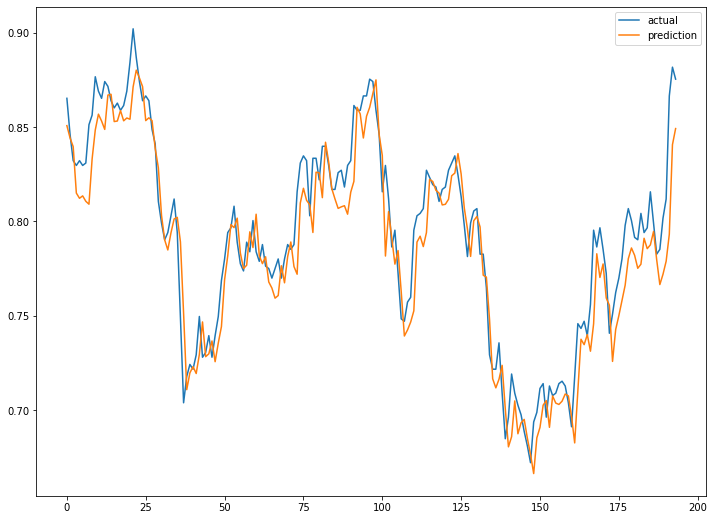

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint


feature_cols = ['stock','china','japan','euro','america','gold','silver','cooper','score']
label_cols = ['stock']

lst = []

for i in range(6,7):
  
  TEST_SIZE = 200
  train = df_scaled[:-TEST_SIZE]
  test = df_scaled[-TEST_SIZE:]

  train_feature = train[feature_cols]
  train_label = train[label_cols]

  test_feature = test[feature_cols]
  test_label = test[label_cols]

  train_feature, train_label = make_dataset(train_feature, train_label, i)

  x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
  test_feature, test_label = make_dataset(test_feature, test_label, i)


  model = Sequential()
  model.add(LSTM(16, 
                 input_shape=(train_feature.shape[1], train_feature.shape[2]), 
                 activation='relu', 
                 return_sequences=False)
            )
  model.add(Dense(1))



  # reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
  #                               patience=5, min_lr=0.01)
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
  early_stop = EarlyStopping(monitor='val_loss', patience=5)
  # filename = os.path.join(model_path, 'tmp_checkpoint.h5')
  #checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

  history = model.fit(x_train, y_train, 
                      epochs=200, 
                      batch_size=16,
                      validation_data=(x_valid, y_valid),
                      callbacks=[early_stop])
                     
                     


  acc = model.evaluate(test_feature, test_label, batch_size=1)
  
  lst.append([i, acc[0], acc[1]])
  print(i)


pred = model.predict(test_feature)

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
pred_trans = []
test_trans = []

for i in range(len(pred)):
  pred_trans.append(pred[i] * (max(data['stock'])-min(data['stock'])) + min(data['stock']))

for i in range(len(pred)):
  test_trans.append(test_label[i] * (max(data['stock'])-min(data['stock'])) + min(data['stock']))

NameError: ignored

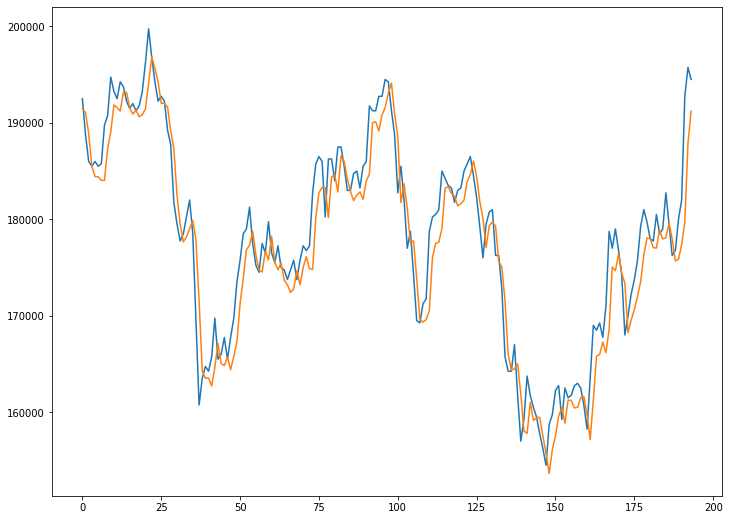

In [ ]:
pred = model.predict(test_feature)

plt.figure(figsize=(12, 9))
plt.plot(test_trans, label='actual')
plt.plot(pred_trans, label='prediction')
# plt.xticks(np.arange(5,218,20),labels=xtic)
plt.legend()
plt.show()

In [ ]:

feature_cols = ['stock','china','japan','euro','america','gold','silver','cooper','score']
label_cols = ['stock']

all_feature = df_scaled[feature_cols]
all_label = df_scaled[label_cols]

All_feature, All_label = make_dataset(all_feature, all_label, 6)

pred_all = model.predict(All_feature)

pred_all_trans = []
test_all_trans = []

for i in range(len(pred_all)):
  pred_all_trans.append(pred_all[i] * (max(data['stock'])-min(data['stock'])) + min(data['stock']))

for i in range(len(pred_all)):
  test_all_trans.append(All_label[i] * (max(data['stock'])-min(data['stock'])) + min(data['stock']))



In [ ]:
lst_5=[]
for i in range(len(pred_all_trans),0,-1):
  lst_5.append(pred_all_trans[-i][0])

  # pred_stock = pred_all_trans[-900:]
day_index = data[6:].index

result_data = data['stock'][6:]
result = pd.DataFrame({'actual':result_data, 'predict':lst_5})

# result_index = data[-190:].index
result.set_index(day_index, inplace=True)



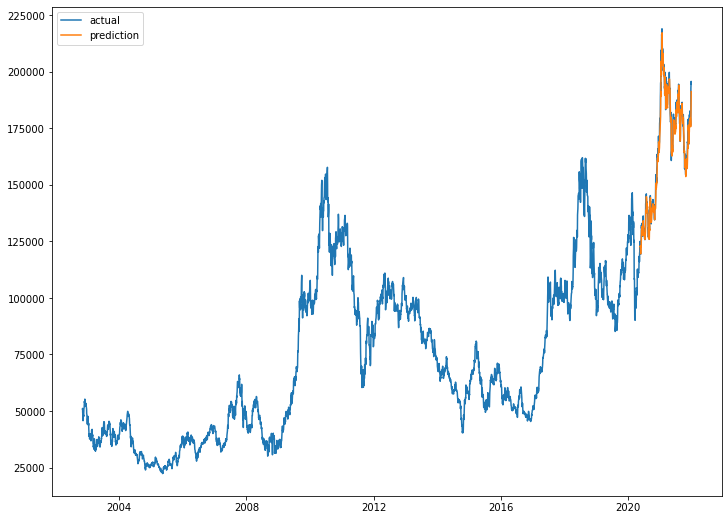

In [ ]:

pred = model.predict(test_feature)
# xtic = ['2018-05','2018-09','2019-01','2019-05','2019-09','2020-01','2020-05','2021-09','2021-12']

plt.figure(figsize=(12, 9))
plt.plot(result['actual'], label='actual')
plt.plot(result['predict'][-400:], label='prediction')
# plt.xticks(np.arange(5,218,15),labels=xtic)
plt.legend()
plt.show()

In [ ]:
d=[]
for i in range(200,0,-1):
  d.append(pred_all_trans[-i][0])

In [ ]:
# pred_stock = pred_all_trans[-:]
# d = data[-200:].index
result_data = data['stock'][-200:]
result = pd.DataFrame({'actual':result_data, 'predict':d})

result_index = data[-200:].index
result.set_index(d, inplace=True)



KeyError: ignored

In [ ]:
result

,actual,predict
date,,
2021-03-12,190750,184035.018393
2021-03-15,194250,187351.663879
2021-03-16,197500,191502.804583
2021-03-17,194250,193605.817878
2021-03-18,195750,189246.645367
...,...,...
2021-12-22,180000,174153.237969
2021-12-23,182000,175514.318827
2021-12-24,192750,178325.995412


In [ ]:
# acc = model.evaluate(test_feature, test_label, batch_size=1)
# print(acc[1])

# mse = tf.keras.losses.MeanSquaredError()
# print(mse(test_label,pred))

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_trans, pred_trans,squared=False)
rmse

2891.7213488980083

In [ ]:
print(lst)
for i in range(0,30):
  print(i, lst[i][1])

[[1, 0.0006951750838197768, 0.02636617235839367], [2, 0.0012156852753832936, 0.03486667945981026], [3, 0.0011159698478877544, 0.03340613469481468], [4, 0.00030647750827483833, 0.017506498843431473], [5, 0.0003725604619830847, 0.019301824271678925], [6, 0.00021631637355312705, 0.014707697555422783], [7, 0.00031427567591890693, 0.017727822065353394], [8, 0.00024035527894739062, 0.015503395348787308], [9, 0.00032126286532729864, 0.017923805862665176], [10, 0.0004070855211466551, 0.0201763603836298], [11, 0.0002609686926007271, 0.01615452580153942], [12, 0.00034886502544395626, 0.018677929416298866], [13, 0.0006909389630891383, 0.026285717263817787], [14, 0.0002575870312284678, 0.016049517318606377], [15, 0.0002857396029867232, 0.01690383441746235], [16, 0.00024621450575068593, 0.015691222622990608], [17, 0.00022050966799724847, 0.014849567785859108], [18, 0.0003031964006368071, 0.017412535846233368], [19, 0.0005559322889894247, 0.02357821725308895], [20, 0.0007213348289951682, 0.026857675